<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/12_WatsonToneAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-project - creating a dataframe from analysed text data

For this project you are going to use the IBM Watson Tone Analyser API.  You will send text data to it, use security information stored in a config file to keep it secret, receive the results in JSON format, investigate the structure of the results and build a dataframe from them.

Then you will use the results to create a visualisation of tone and to report an overall set of statistics from the data.

---

## Step 1 - sign up for IBM Watson services to use the Tone Analyser

1.  Sign up for [IBM Watson](https://cloud.ibm.com/registration?cm_mmc=dw-_-cognitive-_-topcoder-_-communityEducational1)
2.  Click 'Try on Cloud at no cost'  
3.  Select the London region  (costs reduced and performance improved when you use the nearest servers)  
4.  Create an IBM Cloud account (enter email and accept terms)  
5.  Follow the instructions to create the account  
6.  Provision the services  
7.  Then go to IBM Watson Studio  
8.  Select Tone Analyzer under the Your Services heading  
9.  You will be shown the **url** for the Tone Analyser API and an **API key** which is needed for using the API.

# Step 2 - add security to your worksheet to keep your apikey and url hidden

You can do this by using environment variables, which are stored in the operating system for this worksheet.

We will use a simplified system for storing the sensitive data so that it isn't visible in the worksheet:

1.  Ask for the api key to be input and store it in an environment variable called apikey

2.  Ask for the url to be input and store it in an environment variable

3.  Run the cell, type in the api key, then the url.  Once tis has been done.  Remove the output part of the cell.

In [ ]:
import os

# add the code to ask for the URL, then run this cell and when it has completed, remove the output (note: you will need to do this again if you return to the worksheet)
os.environ['APIKEY'] = input("Enter API key: ")
os.environ['URL'] = input("Enter URL: ")


# Install the ibm_watson libraries so that you can use their functions

In [ ]:
# install the ibm_watson libraries

!pip install ibm_watson

     |████████████████████████████████| 413 kB 18.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 68 kB 6.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 138 kB 54.2 MB/s 
  Created wheel for ibm-watson: filename=ibm_watson-5.3.1-py3-none-any.whl size=409192 sha256=4678dc72bb009598abee540e47b9e967699f9d2cc223458e56547c5c263fb1dc
  Stored in directory: /root/.cache/pip/wheels/df/37/94/3d98f00e5be5dc05434c93028f36ae7ff06705f7939f04797b
  Created wheel for ibm-cloud-sdk-core: filename=ibm_cloud_sdk_core-3.14.0-py3-none-any.whl size=83275 sha256=d9d1a353c07a8f41f7a7875db1d062522ddc1a9fa5aaedd2a4c52d2b622c0bb3
  Stored in directory: /root/.cache/pip/wheels/87/d3/a0/fa4679c34222e203548311390d6baefe8c0e8fddadde1efa73
Successfully built ibm-watson ibm-cloud-sd

---

## Test to make sure it works

1.  Open this file, which has some text for you to test with: https://drive.google.com/file/d/1m65cPQGYQd1mwvEmfZw69-GMUBdo43k0/view?usp=sharing.  You will be able to copy and paste the text into here as needed.

2.  Get the environment variable for each of the two pieces of security information so that these do not need to be included in your notebook (have the keys available for copying and pasting).  To do this:

  ``` apikey = os.environ.get('APIKEY') ```

3.  Run the code below,which will create a ToneAnalyzer with the credentials from your environment variables, then paste the text from the **text-for-analysis.txt** file

4.  Decide what the data looks like and how this might be represented in a pandas dataframe

In [ ]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import os
import json

# get credentials from the environment variables you set
def get_secret(key):
    # add code here to get the keys from the environment variable and return the requested key
    # if there is an error print an error message and return None
    return os.environ.get(key)


    
def get_text_for_analysis():
    # add code here to input the text from the text-for-analysis.txt file and return the text it reads as one string
    # if there is an error, return None
    # return 'Team, I know that times are tough! Product sales have been disappointing for the past three quarters. We have a competitive product, but we need to do a better job of selling it!'
    return 'But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.'
     
    
# create a ToneAnalyzerV3 object, version 2017-09-21 using api key and url from config
authenticator = IAMAuthenticator(apikey=get_secret('APIKEY'))
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(get_secret('URL'))

# get the text for analysis from the file
text = get_text_for_analysis()
if text:
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        content_type='application/json'
    ).get_result()    
    print(tone_analysis)
else:
    print("No data")

# WORKING WITH THE OUTPUT OF TEXT ANALYSIS

### Watson Tone Analyser API Output
---

This is the output that the given text will produce. You will need to assign this output to a variable called **tone_analysis** in the function you are going to write below. 

```
{'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}

```



In [ ]:
tone_analysis = {'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}

To me it looks like a nested set of dictionaries. This is the second time, I am seeing a JSON data output. Last time, we looked at retrieving JSON data from API we had clearly drawn out specific part of regional data marked "data". This time we have a whole output so we will have to learn how to separate all this into a format that can be easily understood. 

### Create (on paper) an idea of how this data might be organised into a data table

1.  How many bits of information are there about the document as a whole?
2.  How many bits of information are there about each sentence?
3.  If all tone analysis records were included in the dataframe, how many rows would there be?
4.  What information would be included in each row?

1. There are 2 document tones and 3 sentence tones, marked by sentence_id from 0-2. However, sentence id 1 has 2 scores associated with it.

2. Each document has score, tone_id and tone_name. Each of the se0ntence has tones that have the following:
*   text
*   score
*   tone_id
*   tone_name

3. There are 3 sentence rows (one for each id) and 2 rows for document tone. If we merge all of these, I would expect 6 rows( including 2 rows for sentence 1).

4. In each row we will have the score, tone_id and tone_name.

All of these are based on me working out on MS WORD by looking at the different levels of dictonaries from the out put. This is what I have from MS WORD

{“document_tone”:
{“tones”: [{“score”: 0.582191, ”tone_id”: ”sadness”, ”tone_name”: ”Sadness”}, 
{“score”: 0.829888, ”tone_id”: ”analytical”, ”tone_name”: ”Analytical”}

“sentences_tone”: 
{“sentence_id”: 0, ”text”: ”Team, I know that times are tough!”, ”tones”: [{“score”: 0.801827, ”tone_id”: ”analytical”, ”tone_name”: ”Analytical”}]}, 

{“sentence_id”: 1, ”text”: ”Product sales have been disappointing for the past three quarters.”, 
”tones”: [{“score”: 0.817406, ”tone_id”: ”sadness”, ”tone_name”: ”Sadness”},
{“score”: 0.687768, ”tone_id”: ”analytical”, ”tone_name”: ”Analytical”}]}, 

{“sentence_id”: 2, ”text”: ”We have a competitive product, but we need to do a better job of selling it!”, ”tones”: [{“score”: 0.506763, ”tone_id”: ”analytical”, ”tone_name”: ”Analytical”}]}

As you can see, the second sentence has 2 possible tones. 


Based on this, I will try to work out the following questions.

### Create a dataframe and start to populate with the data

You can create a **dataframe** from this data either by converting it manually into a table OR by using the pandas function pd.json_normalise(data).  

**Manually**:

One way to do this would be to create a list of dictionary records, with each record formed from the data from each row in the original 'sentences_tone' data.  You will need to loop through the rows in the 'sentences_tone' list, nesting a loop through the 'tones' list for each sentence.  For each, copy across the columns you feel should be included.

_Hint:_  
```
 for row in sentence_data:
        for col in row['tones']:
            new_row = {'sentence_id':row['sentence_id'], 'text':row['text'], 'tone_score':col['score'], 'tone_id':col['tone_id'],'tone_name':col['tone_name']}
```
**Using pandas**:

An alternative way to do this would be to create a pandas dataframe from the sentences_tone data list (using `pd.json_normalise(data)`)

I would prefer to use pandas library to do this - only because it will save time from reinvening the wheel and also will allow be to practice the things I learned to do with pandas once more.

In [ ]:
import pandas as pd
import numpy as np
import requests
import json

# convert json data to a dataframe with one row for each tone for each sentence
def convert_to_tones_table(data):
    # return the data normalized into a dataframe (pd.json_normalise(data))
    # the dataframe should have the columns: sentence_id, text, score, tone_id, tone_name
    df = pd.json_normalize(data)
    return df

#split the data into document data and sentence data
tone_analysis = {"document_tone": {"tones": [{"score": 0.582191, "tone_id": "sadness", "tone_name": "Sadness"}, {"score": 0.829888, "tone_id": "analytical", "tone_name": "Analytical"}]}, "sentences_tone": [{"sentence_id": 0, "text": "Team, I know that times are tough!", "tones": [{"score": 0.801827, "tone_id": "analytical", "tone_name": "Analytical"}]}, {"sentence_id": 1, "text": "Product sales have been disappointing for the past three quarters.", "tones": [{"score": 0.817406, "tone_id": "sadness", "tone_name": "Sadness"}, {"score": 0.687768, "tone_id": "analytical", "tone_name": "Analytical"}]}, {"sentence_id": 2, "text": "We have a competitive product, but we need to do a better job of selling it!", "tones": [{"score": 0.506763, "tone_id": "analytical", "tone_name": "Analytical"}]}]}
doc_data = convert_to_tones_table(tone_analysis["document_tone"])
sent_data = convert_to_tones_table(tone_analysis["sentences_tone"])

#print(doc_data)
#print(sent_data)

#Further go through the nested dictionaries and separate the various levels of document data
def doc_analyses(data):
  doc_df = convert_to_tones_table(data["tones"])
  piv_doc_df = doc_df.transpose()
  doc_final = piv_doc_df[0].apply(pd.Series)
  return doc_final

doc_final = doc_analyses(doc_data)

#Further go through the nested dictionaries and separate the various levels of sentence data
def sent_analyses(data):
  sent_data = data.explode(["tones"])
  sent_df = convert_to_tones_table(sent_data["tones"])
  sent_final = sent_df
  sent_final['text'] = sent_data['text'].values #This adds back relevant text to the tones
  return sent_final

sent_final = sent_analyses(sent_data)

print("The document tones are")
print(doc_final)
print("The sentences' tones are")
print(sent_final)





The document tones are
      score     tone_id   tone_name
0  0.582191     sadness     Sadness
1  0.829888  analytical  Analytical
The sentences' tones are
      score  ...                                               text
0  0.801827  ...                 Team, I know that times are tough!
1  0.817406  ...  Product sales have been disappointing for the ...
2  0.687768  ...  Product sales have been disappointing for the ...
3  0.506763  ...  We have a competitive product, but we need to ...

[4 rows x 4 columns]


I now have two dataframes: one for document tones and another for sentence tones. We can do the usual analyses of these data frames using pandas as required. This was very interested worksheet. I am left with the thought that I may have to know more of the JSON data looks like before hand so I know how to handle it, how to normalize it and how many iteretaions of normalizations will be required (which entirely depends on how many levels of informations there are!). From a programming point of view, I have looked at how to data retrieval and wrangling here.

### Summarise the sentence data
*  Which sentence is the most analytical?
*  which sentence is the least analytical?
*  what is the average analytical tone score for the sentences?
*  what do the analytical scores look like in a bar chart?

In [ ]:
def tone_filter(str, df):
  is_str = df['tone_name']== str
  df = df[is_str]
  return df


def get_tone_stats(df):
  max_sent = df.loc[df['score']==df['score'].max(),'text']
  min_sent = df.loc[df['score']==df['score'].min(),'text']
  ave_tone = df['score'].mean()
  return max_sent, min_sent, ave_tone

sent_analy = tone_filter("Analytical", sent_final)


analy_tone_stats = get_tone_stats(sent_analy)
print("The sentence with maximum analytical score is: ", analy_tone_stats[0])
print("The sentence with minimum analytical score is: ", analy_tone_stats[1])
print("The average analytical score is: ", "{:.4f}".format(analy_tone_stats[2]))


The sentence with maximum analytical score is:  0    Team, I know that times are tough!
Name: text, dtype: object
The sentence with minimum analytical score is:  3    We have a competitive product, but we need to ...
Name: text, dtype: object
The average analytical score is:  0.6655


Now that we have everything into dataframes, this question was smooth sailing, again, it gave a an opportunity to practice sorting, filtering and get useful stats from the dataframe. I have put the stats calculation into a function, since in reality we may want to repeat these operrations for other senetence tones. In the current scenario, there is just one senetence with sadness tone, so it doesn't make sense to look at the aggregates for that. However, I have done the function as a practice.

Next, let's build a bar chart of the scores with pandas! I think I have used matplotlib and seaborn a lot. I want to practice a bit with using pandas to plot.

Text(0, 0.5, 'Sentence tone')

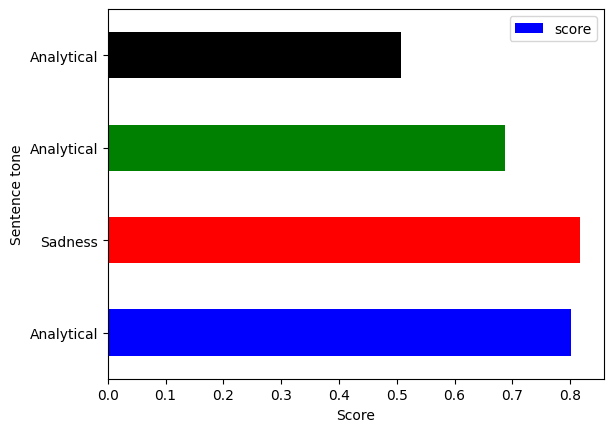

In [ ]:
my_colors = list(['b', 'r', 'g', 'k'])

ax = sent_final.plot.barh(x='tone_name', y='score', rot=0, color=my_colors)
ax.set_xlabel("Score")
ax.set_ylabel("Sentence tone")

### Challenging:  Report the tone data for the whole document
---

Play with the data, create a dataframe for the document_tone, tones data

 ```pd.json_normalize(document_tone)```  

Display the document score for each of the tones in the analysis

I already have a dataframe for document tone. So I will try to work with that to answer these questions.

In [ ]:
print(doc_final)

      score     tone_id   tone_name
0  0.582191     sadness     Sadness
1  0.829888  analytical  Analytical


There are two tones in the document - sadness and analytical with scores of 0.5822 and 0.83 scores respectively.

### Change the text in the text file and analyse the new text.
---

Here is some alternative, happier text.  Replace the text in the text-for-analysis.txt file with the text below.  Then run the notebook cells again to see the results.

But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.

### The result of this analysis is below:

```
{'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
```

We now have a new set of document, sentences and their tones. Looking into the results, I see 2 document tones and 12 sentences. As with the previous case, some of the sentences have more than 1 tone. I am going to use the same function as before to analyse this result as well and convert them into two dataframes - tone_doc and tone_sent respectively.

**Note: I did not want to replace my previous variable. I am aware that it takes up memory. In some case, it does make sense to replace the variable and run the code multiple times. But this time, I want to keep the previous work untouched so I can look at it later for practice. So I have created a new variable, tone_to_analyse to start the analyses.

In [ ]:
tone_to_analyse = {'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}


document = convert_to_tones_table(tone_to_analyse["document_tone"])
sentence = convert_to_tones_table(tone_to_analyse["sentences_tone"])

tone_doc = doc_analyses(document)

tone_sent = sent_analyses(sentence)

print(tone_doc)

print(tone_sent)

      score    tone_id  tone_name
0  0.525587    sadness    Sadness
1  0.670614        joy        Joy
2  0.802229  confident  Confident
       score  ...                                               text
0   0.511185  ...                               But I feel peaceful.
1   0.889390  ...                               But I feel peaceful.
2   0.919911  ...  Your success in the ring this morning was, to ...
3   0.977590  ...                            Your future is assured.
4   0.801827  ...            You will live, secure and safe, Wilbur.
5   0.921250  ...            You will live, secure and safe, Wilbur.
6        NaN  ...                          Nothing can harm you now.
7        NaN  ...      These autumn days will shorten and grow cold.
8   0.621679  ...  The leaves will shake loose from the trees and...
9   0.614764  ...      Christmas will come, and the snows of winter.
10  0.930779  ...  You will live to enjoy the beauty of the froze...
11  0.654012  ...  Winter will pass,

Let me try if I can filter the tones in these dataframes and see what I get. I didn't do it for the document tones in the previous question since it only had one score for each tone, so, further analyses makes no sense. It is the same here too. There are 3 tones in the document each with just one score. So further analysis and filtering of document tones is not useful. I will continue to the analysis of sentences data though. 

First I will find out how many snetences are in each tone.

No. of sentences that have Analytical tones:  1
No. of sentences that have Joyful tones:  6
No. of sentences that have sad tones:  1
No. of sentences that have confident tones:  3
No. of sentences that have fearful tones:  1
No. of sentences that have tentative tones:  1


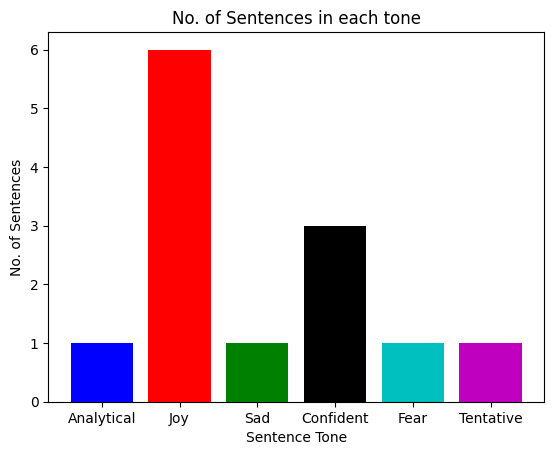

In [ ]:
import matplotlib.pyplot as plt

#filter out various types of tones in the sentences dataframe
sentence_analy = tone_filter("Analytical", tone_sent)

sentence_joy = tone_filter("Joy", tone_sent)

sentence_sad = tone_filter("Sadness", tone_sent)

sentence_conf = tone_filter("Confident", tone_sent)

sentence_tent = tone_filter("Tentative", tone_sent)

sentence_fear = tone_filter("Fear", tone_sent)

# Find out how many sentences in each of the categories

analy_sent = sentence_analy.shape[0]
joy_sent = sentence_joy.shape[0]
sad_sent = sentence_sad.shape[0]
conf_sent = sentence_conf.shape[0]
fear_sent = sentence_fear.shape[0]
tent_sent = sentence_tent.shape[0]

print("No. of sentences that have Analytical tones: ", analy_sent)
print("No. of sentences that have Joyful tones: ", joy_sent)
print("No. of sentences that have sad tones: ", sad_sent)
print("No. of sentences that have confident tones: ", conf_sent)
print("No. of sentences that have fearful tones: ", fear_sent)
print("No. of sentences that have tentative tones: ", tent_sent)

# Let's visualize the results

sent_num = [sentence_analy.shape[0], sentence_joy.shape[0], sentence_sad.shape[0], sentence_conf.shape[0], sentence_fear.shape[0], sentence_tent.shape[0]]
sent_type = ["Analytical", "Joy", "Sad", "Confident", "Fear", "Tentative"]

# position of the bars
left = [1, 2, 3, 4, 5, 6]

#colours for my chart
my_colors = list(['b', 'r', 'g', 'k', 'c', 'm'])

# plotting a bar chart
plt.bar(left, sent_num, tick_label = sent_type, width = 0.8, color=my_colors)
 
# naming the x-axis
plt.xlabel('Sentence Tone')
# naming the y-axis
plt.ylabel('No. of Sentences')
# plot title
plt.title('No. of Sentences in each tone')
 
# function to show the plot
plt.show()


Alternatively, I could have done the above count of each sentence using grouby.count for each tone_name from sentences dataframe. But since I already had the dataframes for each tone filtred out for further analysis (below), I just used the shape to count the rows.

Next we can also get descriptive stats for each sentence tone - such as max, min and mean, like I did before. But some tones have only one sentence (fear, sad, analytical). So I will skip them and do it for the tones, 'Joy' and 'Confident'. 

In [ ]:
joy_tone_stats = get_tone_stats(sentence_joy)
print("The sentence with maximum Joy score is: ", joy_tone_stats[0])
print("The sentence with minimum Joy score is: ", joy_tone_stats[1])
print("The average Joy score is: ", "{:.4f}".format(joy_tone_stats[2]))

conf_tone_stats = get_tone_stats(sentence_conf)
print("The sentence with maximum Confident score is: ", conf_tone_stats[0])
print("The sentence with minimum Confident score is: ", conf_tone_stats[1])
print("The average Confident score is: ", "{:.4f}".format(conf_tone_stats[2]))

The sentence with maximum Joy score is:  13    All these sights and sounds and smells will be...
Name: text, dtype: object
The sentence with minimum Joy score is:  0    But I feel peaceful.
Name: text, dtype: object
The average Joy score is:  0.7528
The sentence with maximum Confident score is:  3    Your future is assured.
Name: text, dtype: object
The sentence with minimum Confident score is:  14    All these sights and sounds and smells will be...
Name: text, dtype: object
The average Confident score is:  0.8530


# What I thought of this worksheet:

This was a very enjoyable project. We started out working in teams and I then went off to complete the rest of the worksheet on my own. As usual, I enjoyed working together with the tea. Some of us have different ways of doing the same thing. In some cases, one method works better than the others and it helps to try out ideas together. For example, pivot doesn't work in my python version so Becky's idea to use transpose was a better option. 

The latter part of this worksheet was left to us. I have tried to explained why I did what I have done already. It was left for me to do what I wanted with the data so I had fun with it. I enjoyed practising things I learnt before such as filtering, visualisations etc. I also have demonstrated that I can now use functions better in my code to call repeated operations including for repeated normalizations, filtering and getting stats. 